# Analisis Regresi Menggunakan Python

## Pengertian Analisis Regresi

**Regresi** adalah metode statistika yang digunakan untuk mencari keterkaitan antara dua variabel atau lebih. **Analisis Regresi** merupakan aktivitas untuk mendefinisikan masalah, mengumpulkan berbagai data terkait (variabel hasil pengamatan / observasi) serta menerapkan metode statistika yang paling tepat untuk masalah keterkaitan antar variabel yang telah didefinisikan tersebut.


## Paket Python yang Diperlukan

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Simple Linear Regression



### Data Random

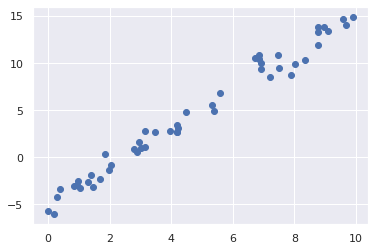

In [88]:
# y=ax+b
# a = slope, x = intercept
# nilai di bawah ini ditetapkan
#
rng = np.random.RandomState(1)
x_random = 10 * rng.rand(50)
y = 2 * x_random - 5 + rng.randn(50)
plt.scatter(x_random, y);

### Data CSV 

In [89]:
cuaca = pd.read_csv('data/weatherHistory.csv')
cuaca.shape # menghasilkan jumlah baris dan kolom
cuaca

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [90]:
kelembaban = cuaca[["Humidity"]]
kelembaban

,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83
...,...
96448,0.43
96449,0.48
96450,0.56
96451,0.60


In [91]:
temperatur = cuaca["Temperature (C)"]
temperatur

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [92]:
# Bagaimana cara menentukan a (slope) dan b (intercept)?
# => buat model, fit data ke dalam model.
#
# Pada kasus ini kita menggunakan variabel temperature dan humidity
# Diawali dari pertanyaan: apakah ada keterkaitan antara kelembaban dengan temperatur?
# Berarti 
# => independent variable adalah kelembaban (kelembaban menentukan temperatur)
# => dependent variable adalah temperatur (temperatur ditentukan oleh kelembaban)
#
x = kelembaban
y = temperatur
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
# nilai intercept: model tsb akan memprediksi respon 34.64 (pembulatan 2 angka) jika x = 0
# nilai slope: model tsb akan memprediksi respon akan berkurang 30.90 jika x bertambah 1

intercept: 34.636929126889605
slope: [-30.89438376]


### Prediksi

In [93]:
x_input =[
    [0.62], 
    [0.50], 
    [0.75], 
    [0.55], 
    [0.63], 
    [0.70], 
    [0.50], 
    [0.50], 
    [0.60], 
    [0.57], 
    [0.45], 
    [0.64], 
    [0.68], 
    [0.59], 
    [0.58], 
    [0.56], 
    [0.66],    
    [0.61]
]
predicted_y = model.predict(x_input)
print('Prediksi temperatur:', predicted_y, sep='\n')

Prediksi temperatur:
[15.4824112  19.18973725 11.46614131 17.64501806 15.17346736 13.0108605
 19.18973725 19.18973725 16.10029887 17.02713038 20.73445644 14.86452352
 13.62874817 16.40924271 16.71818655 17.33607422 14.24663585 15.79135503]


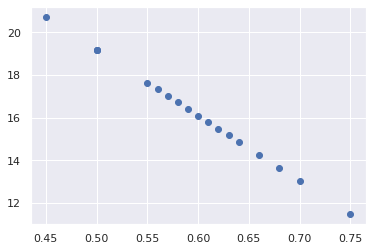

In [94]:
plt.scatter(x_input, predicted_y);

## Multiple Linear Regression

𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ,

In [97]:
x_mul = cuaca.reset_index()[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].values.tolist()
x_mul

[[0.89, 14.1197, 1015.13],
 [0.86, 14.2646, 1015.63],
 [0.89, 3.9284, 1015.94],
 [0.83, 14.1036, 1016.41],
 [0.83, 11.0446, 1016.51],
 [0.85, 13.9587, 1016.66],
 [0.95, 12.3648, 1016.72],
 [0.89, 14.1519, 1016.84],
 [0.82, 11.3183, 1017.37],
 [0.72, 12.525800000000002, 1017.22],
 [0.67, 17.5651, 1017.42],
 [0.54, 19.7869, 1017.74],
 [0.55, 21.9443, 1017.59],
 [0.51, 20.6885, 1017.48],
 [0.47, 15.375500000000002, 1017.17],
 [0.46, 10.4006, 1016.47],
 [0.6, 14.4095, 1016.15],
 [0.63, 11.1573, 1016.17],
 [0.69, 8.5169, 1015.82],
 [0.7, 7.631400000000001, 1015.83],
 [0.77, 7.3899, 1015.85],
 [0.76, 4.9266000000000005, 1015.77],
 [0.79, 6.6493, 1015.4],
 [0.77, 3.9284, 1015.51],
 [0.62, 16.985500000000002, 1014.4],
 [0.66, 17.2109, 1014.2],
 [0.8, 10.8192, 1008.71],
 [0.79, 11.0768, 1014.47],
 [0.82, 6.6493, 1014.45],
 [0.83, 13.0088, 1014.49],
 [0.85, 11.1734, 1014.52],
 [0.83, 12.8156, 1014.16],
 [0.78, 13.7494, 1014.24],
 [0.72, 15.633100000000002, 1014.25],
 [0.61, 17.549000000000003, 1

In [99]:
y_mul = cuaca["Temperature (C)"]
y_mul

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [101]:
model = LinearRegression().fit(x_mul, y_mul)
r_sq = model.score(x_mul, y_mul)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.4185300309037757
intercept: 38.593799350543115
slope: [-3.24398999e+01 -1.94546893e-01 -7.15579969e-04]


### Prediksi

In [103]:
x_mul_input = [[0.78, 11.9712, 1016.11],
 [0.80, 12.2122, 1017.43],
 [0.77, 5.9832, 1016.44],
 [0.69, 9.1234, 1015.21],
 [0.65, 8.2222, 1015.41],
 [0.70, 10.3215, 1017.65],
 [0.71, 11.2121, 1015.17],
 [0.25, 14.0021, 1017.72],
 [0.72, 12.2121, 1018.21],
 [0.65, 12.3412, 1016.65],
 [0.71, 14.2134, 1016.21],
 [0.59, 18.0000, 1016.53],
 [0.80, 19.3243, 1016.21],
 [0.76, 19.2185, 1016.33]
]
predicted_y_mul = model.predict(x_mul_input)
print('Prediksi temperatur:', predicted_y_mul, sep='\n')

Prediksi temperatur:
[10.2346097   9.53798133 11.72371935 13.70887535 15.18165389 13.14964371
 12.65375588 27.03149928 12.13263463 14.37942792 12.06911809 15.22500583
  8.15521738  9.47331057]
